<a href="https://colab.research.google.com/github/k-tharshini/CODSOFT/blob/main/Data_Science_Task_1_(_Titanic_survival_prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Initially import all the necessary packages or libraries in this shell**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)

**Download dataset from Kaggle and Load dataset to the google colab files**

In [ ]:
data = pd.read_csv('/content/titanic.csv')

**Quick look at data**

In [ ]:
print(data.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


**check missing values**

In [ ]:
Missing_value = data.isnull().sum()
print(Missing_value)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Basic preprocessing**

In [ ]:
# Fill missing Age with median
data['Age'] = data['Age'].fillna(data['Age'].median())
Miss_age = data['Age'].isnull().sum()
print(Miss_age)

# Fill Embarked with most frequent
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
Miss_Embarked = data['Embarked'].isnull().sum()
print(Miss_Embarked)

0
0


**Encode Sex and Embarked**

In [ ]:
lc=LabelEncoder()
data['Sex'] = lc.fit_transform(data['Sex'])
data['Embarked'] = lc.fit_transform(data['Embarked'])
print(data['Sex'].head(5))
print(data['Embarked'].head(5))

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64
0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64



**Drop unnecessary value in the dataset**

In [ ]:
data = data.drop(columns=['Cabin','Ticket','Name','PassengerId'])

**After preprocessing the data. The table will be represent.**

In [ ]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


**Derive Features and target**

In [ ]:
X = data.drop('Survived', axis=1)
y = data['Survived']
print (y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


**Split into train/test data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
331       1    1  45.5      0      0   28.5000         2
733       2    1  23.0      0      0   13.0000         2
382       3    1  32.0      0      0    7.9250         2
704       3    1  26.0      1      0    7.8542         2
813       3    0   6.0      4      2   31.2750         2
..      ...  ...   ...    ...    ...       ...       ...
106       3    0  21.0      0      0    7.6500         2
270       1    1  28.0      0      0   31.0000         2
860       3    1  41.0      2      0   14.1083         2
435       1    0  14.0      1      2  120.0000         2
102       1    1  21.0      0      1   77.2875         2

[712 rows x 7 columns]
331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64
     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
709       3    1  28.0      1      1  15.2458         0
439       2    1  31.0      0      0  1

**Train the data using Random Forest algorithm**

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Predict the test data value**

In [ ]:
y_pred = clf.predict(X_test)
print(y_pred)
y_prob = clf.predict_proba(X_test)[:, 1]
print(y_prob)

[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]
[0.33       0.03       0.08416667 0.98       0.37       0.96
 0.83404906 0.08666667 0.69777778 0.95       0.48       0.11
 0.02       0.09       0.21328571 0.99       0.27       0.93603571
 0.16       0.01       0.         0.5465     0.16       0.
 0.         0.07       0.15916667 0.0745     0.22       0.5
 0.01166667 0.70875    0.75       0.56208333 0.25719048 0.15166667
 0.62       0.83404906 0.84       0.         0.03       0.14
 0.         0.12042657 0.39       0.07       0.42195238 0.
 0.28       0.43       0.91       0.96       0.01       0.82
 0.02       0.93       0.05       0.92       0.95       0.3
 0.275      0.921785

**Evaluate the accuracy of model**

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.82


**Confusion Matrix**

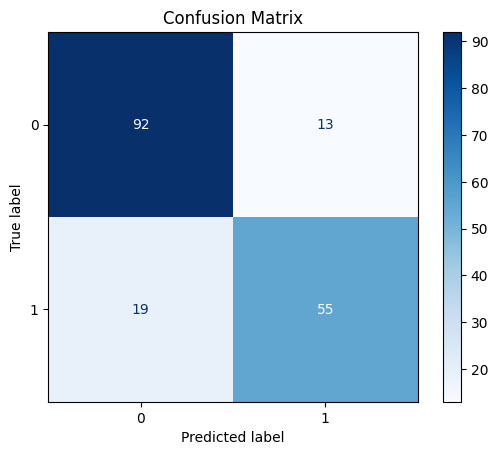

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

**Feature Importance**

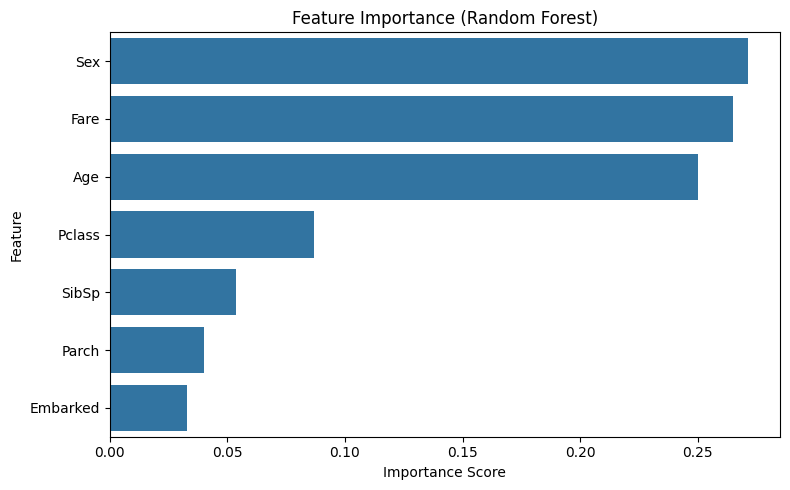

In [ ]:
importances = clf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 5))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

**ROC Curve**

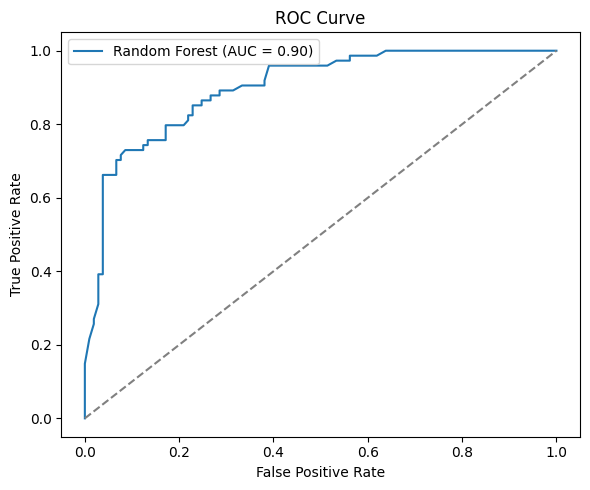

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

**Classification Report**

In [ ]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



**Get manual input from user**

In [ ]:
print("Enter passenger details:")
pclass = int(input("Pclass (1, 2, 3): "))
sex = input("Sex (male or female): ")
age = float(input("Age: "))
sibsp = int(input("Siblings/Spouses aboard (SibSp): "))
parch = int(input("Parents/Children aboard (Parch): "))
fare = float(input("Fare: "))
embarked = input("Embarked (C, Q, S): ")

Enter passenger details:
Pclass (1, 2, 3): 1
Sex (male or female): female
Age: 25
Siblings/Spouses aboard (SibSp): 2
Parents/Children aboard (Parch): 1
Fare: 34.456
Embarked (C, Q, S): 1


**Predicting output from the given input**

In [ ]:
# Encode categorical inputs using previously fit LabelEncoders
sex_encoded = lc.fit_transform([sex])[0]
embarked_encoded = lc.fit_transform([embarked])[0]

# Prepare input DataFrame
user_input = pd.DataFrame([{
    'Pclass': pclass,
    'Sex': sex_encoded,
    'Age': age,
    'SibSp': sibsp,
    'Parch': parch,
    'Fare': fare,
    'Embarked': embarked_encoded
}])

# Predict
prediction = clf.predict(user_input)[0]

# Output result
if prediction == 1:
    print("\n Prediction: The passenger would have SURVIVED.")
else:
    print("\n Prediction: The passenger would NOT have survived.")


 Prediction: The passenger would have SURVIVED.
